In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Cargue el archivo trump.jpg con la librería cv2 y visualice la imagen

In [84]:
img = cv2.imread("/content/trump.jpg", 1)

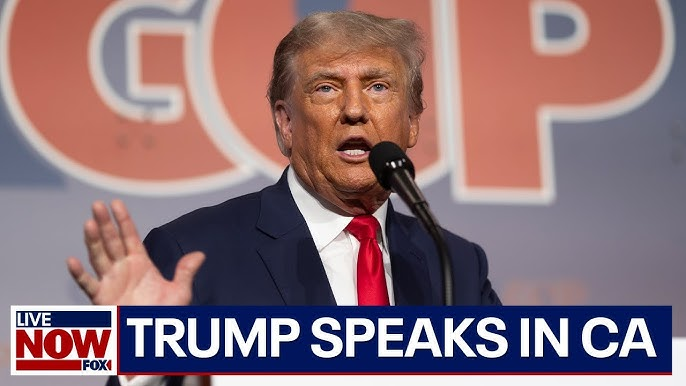

In [85]:
cv2_imshow(img)

# 2. Determine las dimensiones de la imagen

In [4]:
print("Dimensiones: ", img.shape)

Dimensiones:  (386, 686, 3)


#3. Determine cuál es el color (RGB) que más aparece en la imagen

In [5]:
def color_más_frecuente(img):
    pixeles = img.reshape(-1, 3)
    colores_unicos, conteo = np.unique(pixeles, axis=0, return_counts=True)
    indice_color_frecuente = np.argmax(conteo)
    return tuple(colores_unicos[indice_color_frecuente])

print("El color más frecuente en BGR es: ",color_más_frecuente(img))

1902
El color más frecuente en BGR es:  (160, 149, 152)


#4. Incluya su primer nombre dentro de la imagen a partir del píxel (100, 100) empleando el proceso de esteganografía visto en clase

In [39]:
#obtener los binarios de cada letra
nombre = "Andres"
nums = []
for l in nombre:
  nums.append(format(ord(l), "b").zfill(8))

nums

['01000001', '01101110', '01100100', '01110010', '01100101', '01110011']

In [40]:
#pixeles antes del cambio
for i in range(100,118):
  print(img[100][i])

[106 122 191]
[114 132 197]
[126 144 203]
[137 153 206]
[146 162 209]
[154 169 208]
[167 177 211]
[173 183 213]
[179 186 211]
[183 190 210]
[187 193 212]
[191 195 213]
[187 191 209]
[189 191 209]
[189 192 207]
[191 193 204]
[191 192 202]
[191 190 199]


In [41]:
c = 0
idx = 0
cambio = False
for i in range(100, 118):
  #asignar los valores del rgb
  b,g,r = img[100][i]

  #condiciones para cambiar sumar (par o impar)
  if ((b%2 == 0) and nums[c][idx] == '1') or ((b%2 == 1) and nums[c][idx] == '0'):
    b = b+1
  idx = idx+1
  if ((g%2 == 0) and nums[c][idx] == '1') or ((g%2 == 1) and nums[c][idx] == '0'):
    g = g+1

  #en caso de llegar a 7, mandar un binario para cambio de palabra
  if idx == 7:
    idx = 0
    cambio = True
  else:
    cambio = False
    idx = idx+1

  #condiciones para cambiar sumar (par o impar)
  if ((r%2 == 0) and nums[c][idx] == '1') or ((r%2 == 1) and nums[c][idx] == '0'):
    r = r+1

  #si sigue la inserción o no
  if cambio and r%2==0:
    r = r+1
  if cambio and r%2==1 and c==5:
    r = r+1

  #cambiar de palabra
  if cambio == False:
    idx = idx+1
  if cambio:
    c = c+1
  img[100][i] = b,g,r

In [43]:
#Bits resultantes (comparar con las letras de arriba)
for i in range(100,118):
  print(img[100][i])

[106 123 192]
[114 132 198]
[126 145 205]
[138 153 207]
[146 163 209]
[155 170 209]
[168 177 211]
[174 184 213]
[180 186 213]
[184 191 211]
[187 194 212]
[191 196 215]
[188 191 209]
[190 192 209]
[190 193 209]
[192 193 205]
[191 192 202]
[191 191 202]


In [42]:
#Ultimo bit (comparar con las letras de arriba)
for i in range(100,118):
  print(img[100][i]%2)

[0 1 0]
[0 0 0]
[0 1 1]
[0 1 1]
[0 1 1]
[1 0 1]
[0 1 1]
[0 0 1]
[0 0 1]
[0 1 1]
[1 0 0]
[1 0 1]
[0 1 1]
[0 0 1]
[0 1 1]
[0 1 1]
[1 0 0]
[1 1 0]


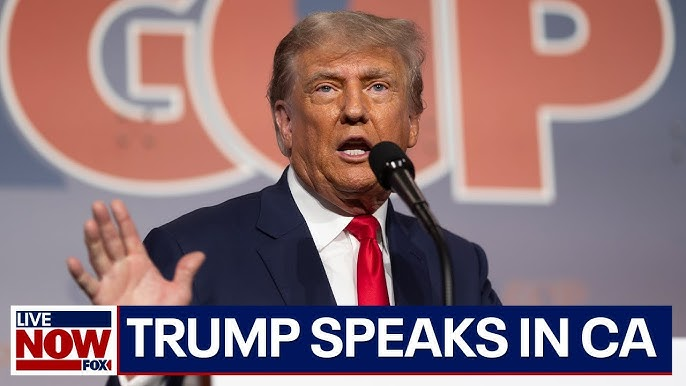

In [44]:
#imagen resultante
cv2_imshow(img)

#5. Cree una nueva imagen donde aparezca el ojo derecho de Trump en donde va el ojo izquierdo, y viceversa, pero rotado 180 grados cada ojo

In [86]:
ojoizq = img[80:97,311:340]
ojoder = img[79:96,362:391]

In [87]:
cv2_imshow(ojoizq)

In [88]:
cv2_imshow(ojoder)

In [89]:
ojoizq = cv2.rotate(ojoizq, rotateCode = cv2.ROTATE_180)
ojoder = cv2.rotate(ojoder, rotateCode = cv2.ROTATE_180)

In [90]:
cv2_imshow(ojoizq)

In [91]:
cv2_imshow(ojoder)

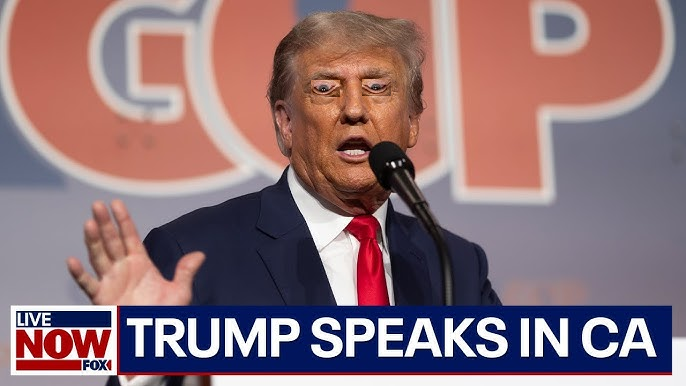

In [92]:
#cambiamos
img2 = img.copy()
img2[80:97,311:340] = ojoder
img2[79:96,362:391] = ojoizq
cv2_imshow(img2)

# 6. Cree una nueva imagen donde el color de cada píxel sea el valor promedio de los píxeles que van alrededor.

Imagen generada:


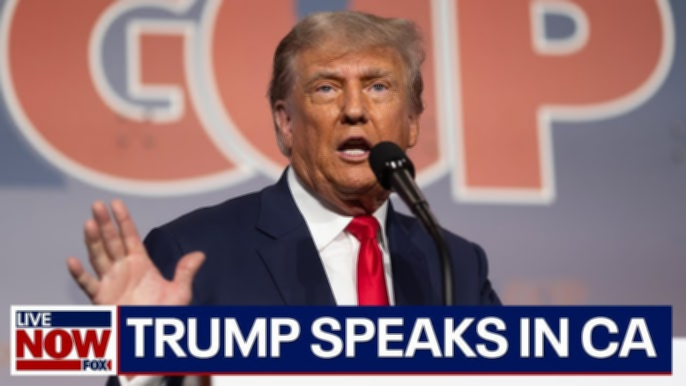

In [112]:
def asignarPxPromedio(image):
    shape = image.shape

    #se crea una nueva imagen totalmente negra (0 en todo) / ausencia de color
    img_nueva = np.zeros(shape, dtype=image.dtype)

    for i in range(shape[0]):
        for j in range(shape[1]):
            #los pixeles de alrededor
            aux = pxAlrededor(image, i, j)

            #promedio de cada valor del RGB
            b = 0
            g = 0
            r = 0
            for c in range(len(aux)):
              b = b + img[aux[c][0]][aux[c][1]][0]
              g = g + img[aux[c][0]][aux[c][1]][1]
              r = r + img[aux[c][0]][aux[c][1]][2]
            b = b/len(aux)
            g = g/len(aux)
            r = r/len(aux)

            img_nueva[i, j] = b,g,r

    return img_nueva

def pxAlrededor(image, i, j):
    shape = image.shape

    #todos los pixeles de alrededor
    indices = [(i - 1, j - 1), (i - 1, j), (i - 1, j + 1),
               (i, j - 1), (i, j + 1),
               (i + 1, j - 1), (i + 1, j), (i + 1, j + 1)]

    #solo los pixeles dentro de la imagen original (depurar las esquinas)
    alrededor = [
        index for index in indices
        if 0 <= index[0] < shape[0] and 0 <= index[1] < shape[1]
    ]

    return alrededor

# Ejemplo de uso:

img3 = asignarPxPromedio(img)
print("Imagen generada:")
cv2_imshow(img3)

Imagen original


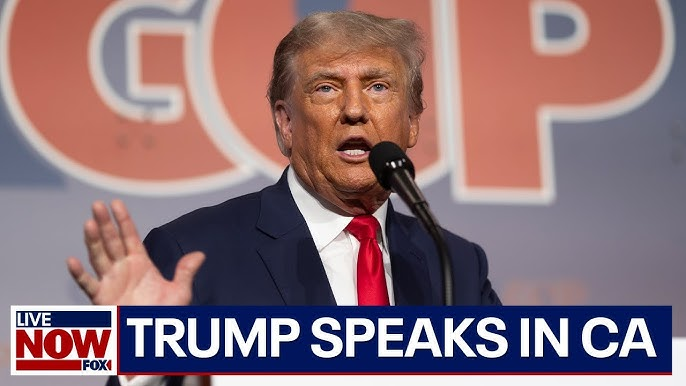

In [110]:
print("Imagen original")
cv2_imshow(img)

# 7. Parta la imagen original en 4 imágenes del mismo tamaño

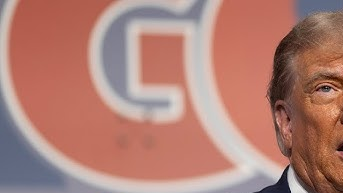

In [115]:
parte1 = img[0:int(img.shape[0]/2), 0:int(img.shape[1]/2)]
cv2_imshow(parte1)

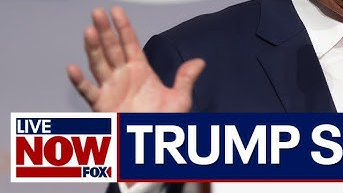

In [116]:
parte2 = img[int(img.shape[0]/2):img.shape[0], 0:int(img.shape[1]/2)]
cv2_imshow(parte2)

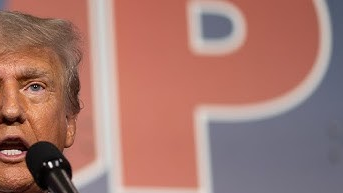

In [119]:
parte3 = img[0:int(img.shape[0]/2), int(img.shape[1]/2):img.shape[1]]
cv2_imshow(parte3)

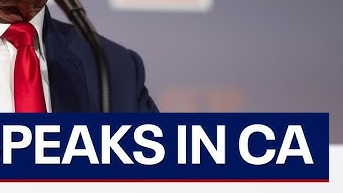

In [120]:
parte4 = img[int(img.shape[0]/2):img.shape[0], int(img.shape[1]/2):img.shape[1]]
cv2_imshow(parte4)

# 8. Invierta la imagen original de derecha a izquierda

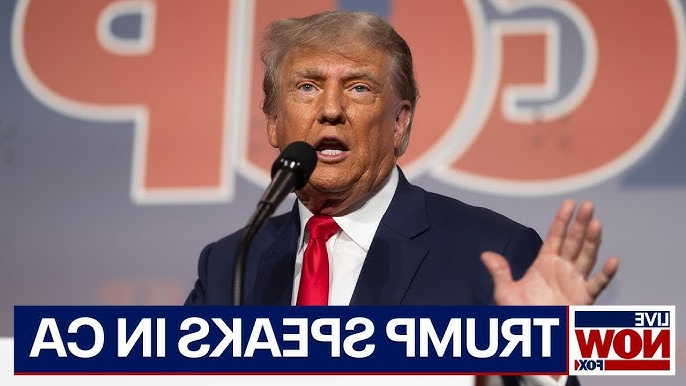

In [122]:
def invertirImagen(image):
    shape = image.shape

    # imagen nueva de color negro
    imagen_invertida = np.zeros(shape, dtype=image.dtype)

    for i in range(shape[0]):
        for j in range(shape[1]):
            index = i * shape[1] + j

            index_invertido = shape[1] - j - 1

            imagen_invertida[i, index_invertido] = image[i, j]

    return imagen_invertida


imagen_invertida = invertirImagen(img)

cv2_imshow(imagen_invertida)